In [1]:
import pandas as pd
import numpy as np
import matplotlib as mt
from datetime import datetime

In [2]:
df = pd.read_csv('data.csv', sep= ',', parse_dates=['timestamp'])

In [3]:
df["timestamp"].isnull().sum()

0

In [4]:
df["count"].isnull().sum()

0

In [5]:
print(df["timestamp"].describe())

count                           2036016
unique                          2036016
top       2020-03-01 20:23:03.837774877
freq                                  1
first     2020-01-01 15:00:01.047143516
last      2020-12-13 20:26:14.202015553
Name: timestamp, dtype: object


/home/dadaia/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


In [6]:
df["delta count"] = df["count"].diff()

In [7]:
df["reset event"] = df["delta count"].apply(lambda x : -x if x < 0 else 0)

In [8]:
df["reset_step_accumulator"] = df["reset event"].cumsum()

In [9]:
df["absolute_steps"] = df["reset_step_accumulator"] + df["count"]

In [10]:
df["absolute_steps"].describe()

count    2.036016e+06
mean     7.960278e+05
std      4.590071e+05
min      0.000000e+00
25%      3.976570e+05
50%      7.907540e+05
75%      1.190183e+06
max      1.611294e+06
Name: absolute_steps, dtype: float64

In [11]:
df.loc[:,['count', 'delta count', 'reset event', 'reset_step_accumulator',
'absolute_steps']]

,count,delta count,reset event,reset_step_accumulator,absolute_steps
0,0,NaN,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2036011,0,0.0,0.0,1611294.0,1611294.0
2036012,0,0.0,0.0,1611294.0,1611294.0
2036013,0,0.0,0.0,1611294.0,1611294.0
2036014,0,0.0,0.0,1611294.0,1611294.0


In [12]:
total_steps = df["absolute_steps"].max()
total_steps

1611294.0

In [13]:
df["timeSeconds"] = (df["timestamp"] - df["timestamp"].loc[0]).dt.total_seconds()

In [14]:
df.loc[:,['timeSeconds', 'absolute_steps']]

,timeSeconds,absolute_steps
0,0.000000e+00,0.0
1,1.102337e+01,0.0
2,2.186374e+01,0.0
3,3.318072e+01,0.0
4,4.433021e+01,0.0
...,...,...
2036011,3.000033e+07,1611294.0
2036012,3.000034e+07,1611294.0
2036013,3.000035e+07,1611294.0
2036014,3.000036e+07,1611294.0


<AxesSubplot:xlabel='timestamp'>

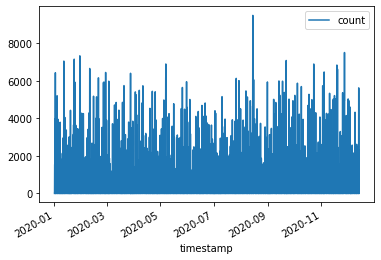

In [15]:
df.plot(x="timestamp", y="count")

<AxesSubplot:xlabel='timestamp'>

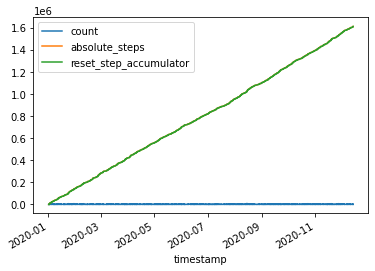

In [16]:
df.plot(x="timestamp", y=["count","absolute_steps", "reset_step_accumulator"])

In [17]:
df["velocity"] = df["absolute_steps"].diff() / df["timeSeconds"].diff()
df["velocity"].head()

0    NaN
1    0.0
2    0.0
3    0.0
4    0.0
Name: velocity, dtype: float64

<AxesSubplot:xlabel='timestamp'>

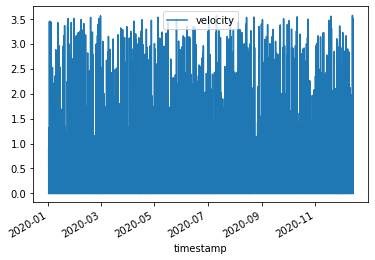

In [18]:
df.plot(x="timestamp", y="velocity")

In [19]:
def nearestValue(value):
    absolute_value = np.abs(df["timeSeconds"] - value)
    smallest_difference_index = absolute_value.argmin()
    closest_element = df["timeSeconds"][smallest_difference_index]
    return closest_element

In [ ]:
df["observed_time"] = df["timeSeconds"].apply(lambda x: nearestValue(x-600))

In [ ]:
def timeToStep(x):
    return df["absolute_steps"][df["timeSeconds"] == x].max()

In [ ]:
df["observed_steps"] = df["observed_time"].apply(lambda x: timeToStep(x))

In [ ]:
df["oneWalking"] = df["absolute_steps"] - df["observed_steps"] >= 1200

In [ ]:
df["edge_mask"] = df["oneWalking"].diff()

In [ ]:
df["stop_walking2"] = df["oneWalking"] & df["edge_mask"]

In [ ]:
df.loc[:, ["timeSeconds", "observed_time", "absolute_steps", "observed_steps", 
           "oneWalking", "edge_mask", "stop_walking2"]]

In [ ]:
walkingNumber = (df["stop_walking2"].value_counts())
walkingNumber

In [ ]:
walkingNumber[1]